En este archivo realizo el EDA de cada csv creado por moneda, trayendome el DF que contiene, fechas desde enero del 2020 hasta la actualidad, precio de cierre, capitalizacion de mercado y volumen del mercado (la cantidad de una criptomoneda que se ha comprado y vendido en todos los intercambios en el dia)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


In [2]:
ete= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\ethereum.csv')

In [3]:
ete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1327 non-null   object 
 1   PRECIO-usd      1327 non-null   float64
 2   MARKET_CAP-usd  1327 non-null   float64
 3   TOTAL_VOLUMES   1327 non-null   float64
 4   COIN_ID         1327 non-null   object 
dtypes: float64(3), object(2)
memory usage: 52.0+ KB


In [4]:
ete.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1327.000000,1.327000e+03,1.327000e+03
mean,1702.957838,2.015837e+11,1.796569e+10
std,1161.163692,1.379349e+11,1.371466e+10
min,110.597898,1.195663e+10,2.179799e+09
25%,560.481576,6.398917e+10,9.416695e+09
50%,1664.977462,1.987191e+11,1.433122e+10
75%,2401.615540,2.801203e+11,2.168931e+10
max,4815.004634,5.716658e+11,1.409065e+11


In [5]:
ete['FECHAS']=pd.to_datetime(ete['FECHAS'])

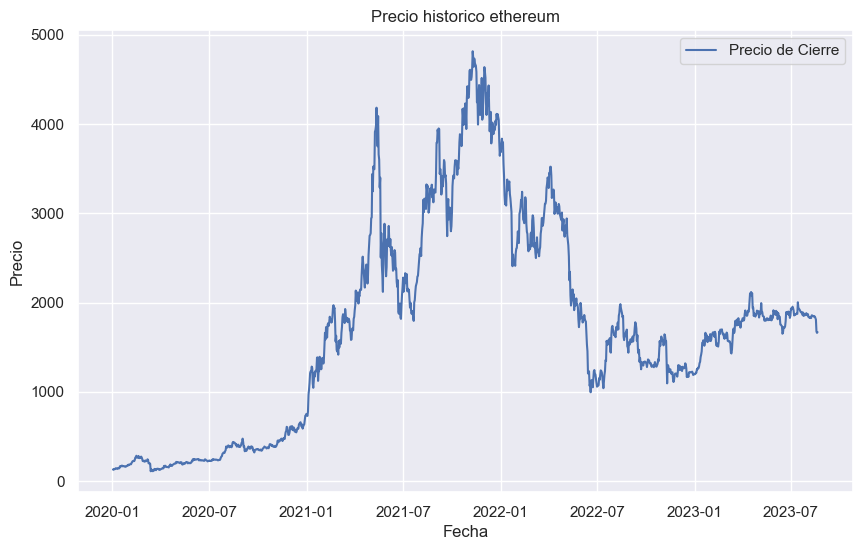

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(ete['FECHAS'], ete['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico ethereum')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

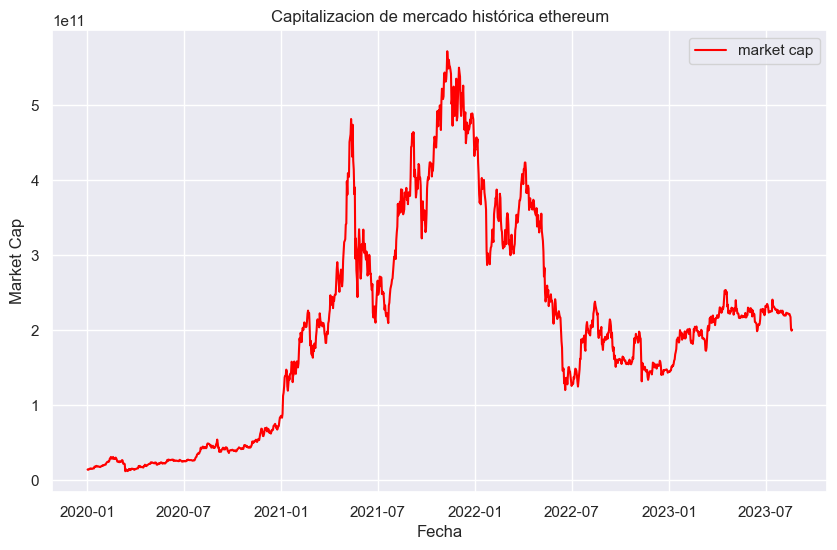

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(ete['FECHAS'], ete['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica ethereum')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

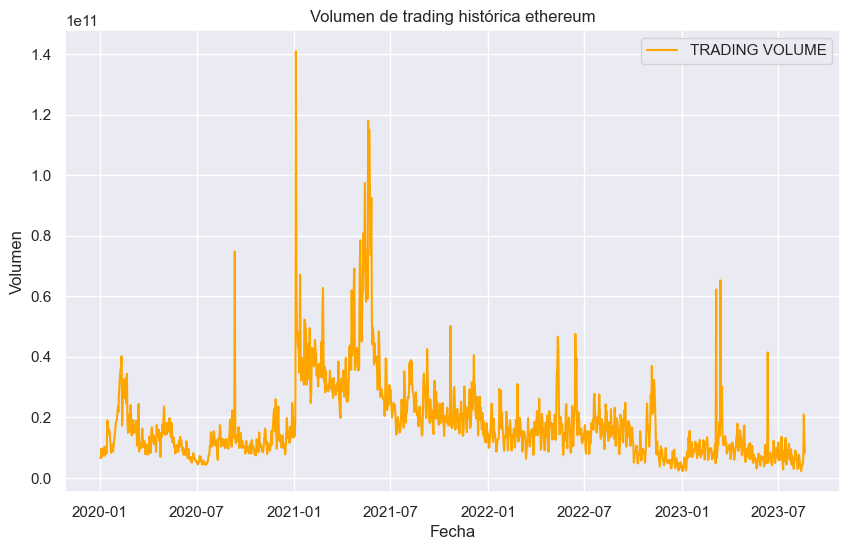

In [8]:

plt.figure(figsize=(10, 6))
plt.plot(ete['FECHAS'], ete['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica ethereum')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(ete['PRECIO-usd'], window=rsi_period)
ete['RSI'] = indicator.rsi()

ete.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1322,2023-08-16,1826.913128,2.194728e+11,4.416612e+09,ethereum,41.582095
1323,2023-08-17,1809.460474,2.174445e+11,6.472231e+09,ethereum,37.430431
1324,2023-08-18,1675.862171,2.014830e+11,2.096277e+10,ethereum,20.531470
1325,2023-08-19,1660.679110,1.993229e+11,1.185691e+10,ethereum,19.456390
1326,2023-08-20,1669.233455,2.006764e+11,8.226872e+09,ethereum,21.936554


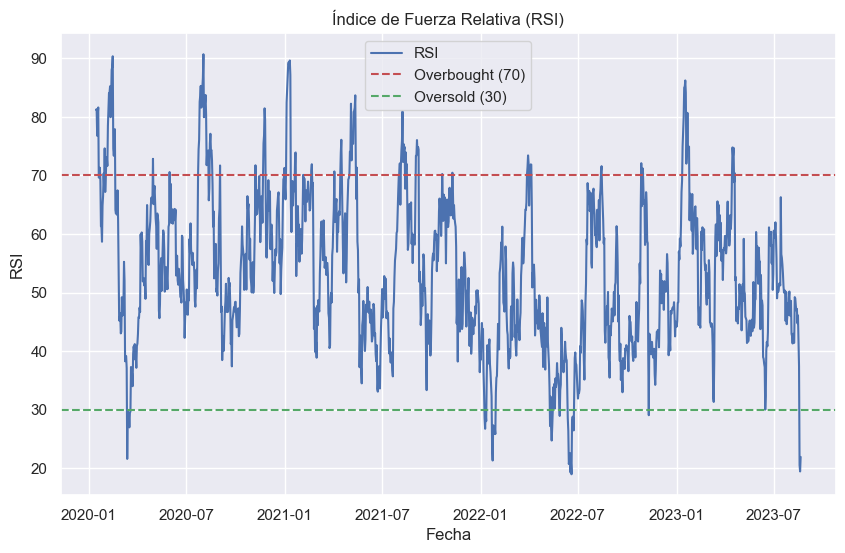

In [10]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(ete['FECHAS'], ete['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
rolling_window = 50
ete['MovingAverage'] = ete['PRECIO-usd'].rolling(window=rolling_window).mean()

print(ete.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES   COIN_ID  RSI  \
0 2020-01-02  130.484685    1.423059e+10   6.623732e+09  ethereum  NaN   
1 2020-01-03  127.045258    1.385979e+10   6.497298e+09  ethereum  NaN   
2 2020-01-04  133.702649    1.461319e+10   9.655245e+09  ethereum  NaN   
3 2020-01-05  134.136883    1.463621e+10   6.958394e+09  ethereum  NaN   
4 2020-01-06  135.005714    1.473883e+10   7.260645e+09  ethereum  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


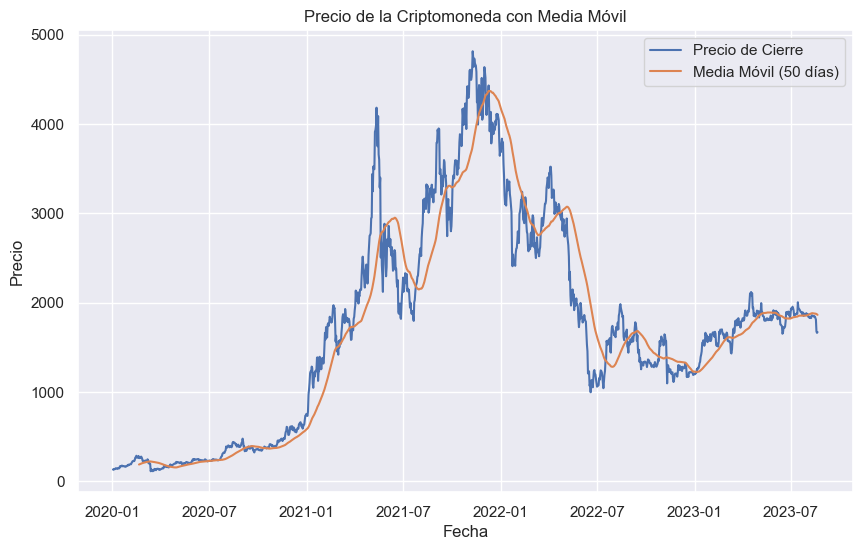

In [12]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(ete['FECHAS'], ete['PRECIO-usd'], label='Precio de Cierre')
plt.plot(ete['FECHAS'], ete['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
ete.to_csv('ethereumDB.csv', index=False)